1: Loading dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_trans = pd.read_csv('train_transaction.csv')
train_id = pd.read_csv('train_identity.csv')

In [4]:
train_trans.shape, train_id.shape

((590540, 394), (144233, 41))

2:Check the data memory:

In [7]:
memory_trans = train_trans.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(memory_trans))

Memory usage of dataframe is 1775.15 MB


In [8]:
memory_id = train_id.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(memory_id))

Memory usage of dataframe is 45.12 MB


Write function for check the columns datatype

In [9]:
np.finfo(np.float64).max,np.finfo(np.float64).min,np.finfo(np.float32).max,np.finfo(np.float32).min,np.finfo(np.float16).max,np.finfo(np.float16).min

(1.7976931348623157e+308,
 -1.7976931348623157e+308,
 3.4028235e+38,
 -3.4028235e+38,
 65500.0,
 -65500.0)

In [11]:
np.iinfo(np.int64).max,np.iinfo(np.int64).min,np.iinfo(np.int32).max,np.iinfo(np.int32).min,np.iinfo(np.int16).max,np.iinfo(np.int16).min

(9223372036854775807,
 -9223372036854775808,
 2147483647,
 -2147483648,
 32767,
 -32768)

Conver the type and decrease our memory 

In [12]:
f64 = train_trans.select_dtypes(include ='float64')
for i in f64:
    if train_trans[i].max() < 65500 and train_trans[i].min() > -65500:
        train_trans[i] = train_trans[i].astype(np.float16)
    elif train_trans[i].max() < 3.4028235e+38 and train_trans[i].min() > -3.4028235e+38:
        train_trans[i] = train_trans[i].astype(np.float32)
    else:
        train_trans[i] = train_trans[i].astype(np.float64)
        
    

In [13]:
int64 = train_trans.select_dtypes(include ='int64')
for i in int64:
    if train_trans[i].max() < 32767 and train_trans[i].min() > -32768:
        train_trans[i] = train_trans[i].astype(np.int16)
    elif train_trans[i].max() < 2147483647 and train_trans[i].min() > -2147483648:
        train_trans[i] = train_trans[i].astype(np.int32)
    else:
        train_trans[i] = train_trans[i].astype(np.int64)
        
        


In [14]:
memory_trans = train_trans.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(memory_trans))

Memory usage of dataframe is 542.91 MB


correlation analysis to reduce some redudancies

In [18]:
def get_nan_dic(df):
    """
    get NaN dictionary
    return: a dictionary with #of null values as key and feature names as value
    """
    nulls = df.isna()
    nan_dic = {}
    for f in df.columns:
        c=nulls[f].sum()
        nan_dic[c]=[]
    for f in df.columns:
        c = nulls[f].sum()
        nan_dic[c].append(f)
    return nan_dic

In [19]:
nan_dic = get_nan_dic(train_trans)

In [20]:
print(nan_dic)

{0: ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14'], 8933: ['card2'], 1565: ['card3'], 1577: ['card4'], 4259: ['card5'], 1571: ['card6'], 65706: ['addr1', 'addr2'], 352271: ['dist1'], 552913: ['dist2'], 94456: ['P_emaildomain'], 453249: ['R_emaildomain'], 1269: ['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315'], 280797: ['D2'], 262878: ['D3'], 168922: ['D4'], 309841: ['D5'], 517353: ['D6'], 551623: ['D7'], 515614: ['D8', 'D9'], 76022: ['D10'], 279287: ['D11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11'], 525823: ['D12'], 528588: ['D13'], 528353: ['D14'], 89113: ['D15'], 271100: ['M1', 'M2', 'M3'], 281444: ['M4'], 350482: ['M5'], 169360: ['M6'], 346265: ['M7'], 346252: ['M8', 'M9'], 76073: ['V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V

In [21]:
Vs = nan_dic[1269]
Vs

['D1',
 'V281',
 'V282',
 'V283',
 'V288',
 'V289',
 'V296',
 'V300',
 'V301',
 'V313',
 'V314',
 'V315']

In [22]:
#let us check this group, I wrote this function to plot correlation matrix as heatmap
def plot_corr(df,cols):
    fig = plt.figure(figsize=(12,8))
    sns.heatmap(df[cols].corr(),cmap='RdBu_r', annot=True, center=0.0)
    plt.show() 

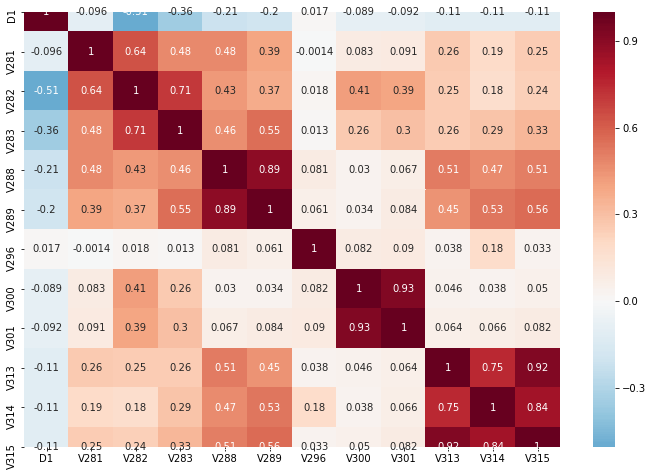

In [23]:
plot_corr(train_trans,Vs)

In [26]:
train_trans

KeyError: 'is Fraud'